In [ ]:
import numpy as np
import pandas as pd


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ECG'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/ECG/mitbih_test.csv
/content/drive/MyDrive/ECG/mitbih_train.csv
/content/drive/MyDrive/ECG/ptbdb_abnormal.csv
/content/drive/MyDrive/ECG/ptbdb_normal.csv


In [ ]:
mitbih_test = pd.read_csv("/content/drive/MyDrive/ECG/mitbih_test.csv")
mitbih_train = pd.read_csv("/content/drive/MyDrive/ECG/mitbih_train.csv")
ptbdb_abnormal = pd.read_csv("/content/drive/MyDrive/ECG/ptbdb_abnormal.csv")
ptbdb_normal = pd.read_csv("/content/drive/MyDrive/ECG/ptbdb_normal.csv")


In [ ]:
mitbih_test.columns = list(range(len(mitbih_test.columns)))
mitbih_train.columns = list(range(len(mitbih_train.columns)))
ptbdb_abnormal.columns = list(range(len(ptbdb_abnormal.columns)))
ptbdb_normal.columns = list(range(len(ptbdb_normal.columns)))


In [ ]:
mitbih_test = mitbih_test.rename({len(mitbih_test.columns)-1: 'Label'}, axis = 1)
mitbih_train = mitbih_train.rename({len(mitbih_train.columns)-1: 'Label'}, axis = 1)
ptbdb_abnormal = ptbdb_abnormal.rename({len(ptbdb_abnormal.columns)-1: 'Label'}, axis = 1)
ptbdb_normal = ptbdb_normal.rename({len(ptbdb_normal.columns)-1: 'Label'}, axis = 1)


In [ ]:
(len(mitbih_test),len(mitbih_train),len(ptbdb_normal),len(ptbdb_abnormal))


(21891, 87553, 4045, 10505)

In [ ]:
data = pd.concat([mitbih_test, mitbih_train, ptbdb_abnormal, ptbdb_normal], axis = 0).sample(frac=1.0, random_state=1).reset_index(drop=True)


In [ ]:
from sklearn.model_selection import train_test_split
y = data['Label']
X = data.drop('Label', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


In [ ]:
# Initialize the Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier()


In [ ]:
# Train the classifier
decision_tree_classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# Predict on the test set
y_pred = decision_tree_classifier.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9180354310599748


In [ ]:
# Generate a classification report
clr = print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     28294
         1.0       0.73      0.71      0.72      4051
         2.0       0.86      0.87      0.86      2141
         3.0       0.58      0.64      0.61       243
         4.0       0.93      0.94      0.93      2470

    accuracy                           0.92     37199
   macro avg       0.81      0.82      0.82     37199
weighted avg       0.92      0.92      0.92     37199



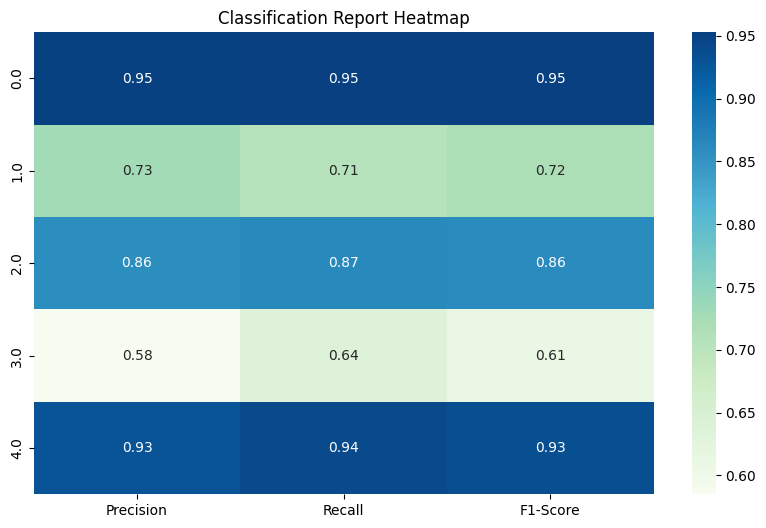

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'],
                 class_report[class_name]['f1-score']] for class_name in class_names]

    # Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'],
                yticklabels=class_names, cmap='GnBu')
plt.title('Classification Report Heatmap')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[26961   958   196    77   102]
 [ 1070  2858    71     9    43]
 [  184    53  1852    23    29]
 [   56     6    22   155     4]
 [   81    49    15     1  2324]]


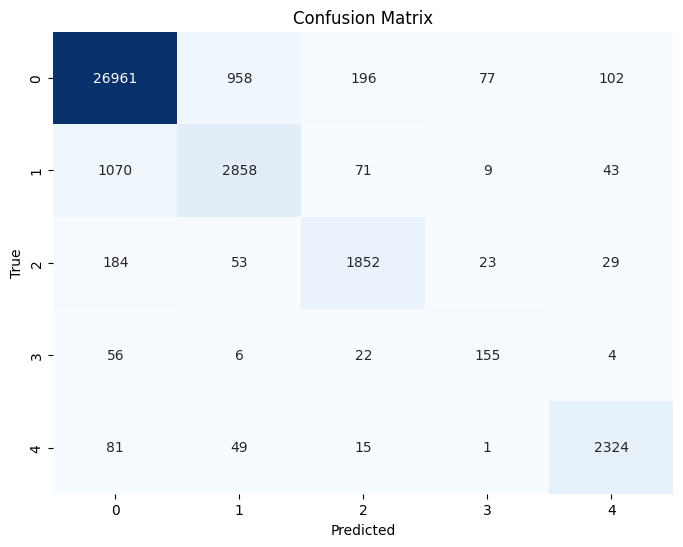

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd


In [ ]:
# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100)  # You can adjust the number of estimators


In [ ]:
# Train the classifier
random_forest_classifier.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Predict on the test set
y_pred = random_forest_classifier.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.9559665582408129


In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm1)


Confusion matrix

 [[28205    62    22     1     4]
 [ 1087  2948    11     0     5]
 [  202    15  1914     7     3]
 [   74     1    23   145     0]
 [  105    11     5     0  2349]]


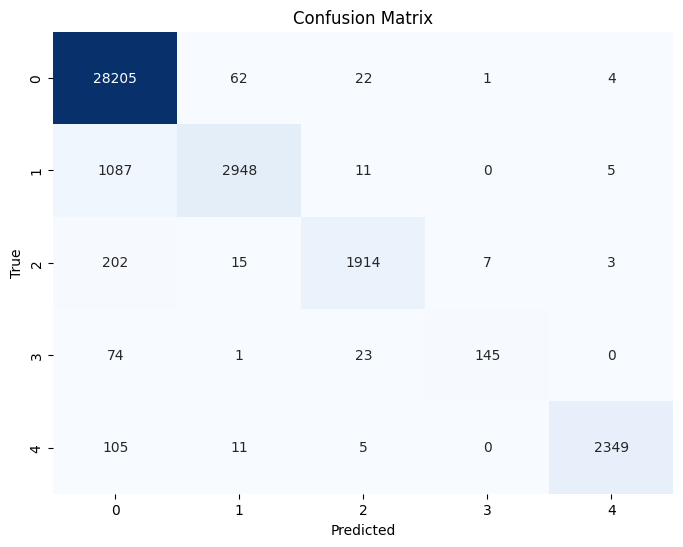

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Generate a classification report
clr1 = print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     28294
         1.0       0.97      0.73      0.83      4051
         2.0       0.97      0.89      0.93      2141
         3.0       0.95      0.60      0.73       243
         4.0       0.99      0.95      0.97      2470

    accuracy                           0.96     37199
   macro avg       0.97      0.83      0.89     37199
weighted avg       0.96      0.96      0.95     37199



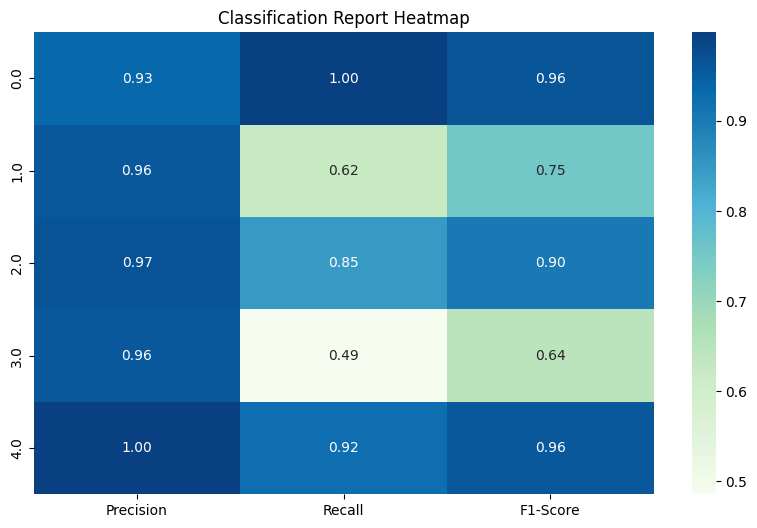

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'],
                 class_report[class_name]['f1-score']] for class_name in class_names]

    # Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'],
                yticklabels=class_names, cmap='GnBu')
plt.title('Classification Report Heatmap')
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier


In [ ]:
ensemble_clf = VotingClassifier(estimators=[('decision_tree', decision_tree_classifier),('random_forest', random_forest_classifier)], voting='hard')


In [ ]:
# Train the ensemble classifier
ensemble_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('decision_tree', DecisionTreeClassifier()),
                             ('random_forest', RandomForestClassifier())])

In [ ]:
# Make predictions
y_pred = ensemble_clf.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Ensemble Classifier Accuracy:", accuracy)


Ensemble Classifier Accuracy: 0.940159681711874


In [ ]:
from sklearn.metrics import confusion_matrix
cm_ens = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm_ens)


Confusion matrix

 [[28246    33    12     1     2]
 [ 1527  2517     6     0     1]
 [  290    32  1813     4     2]
 [   94     4    27   118     0]
 [  137    36    18     0  2279]]


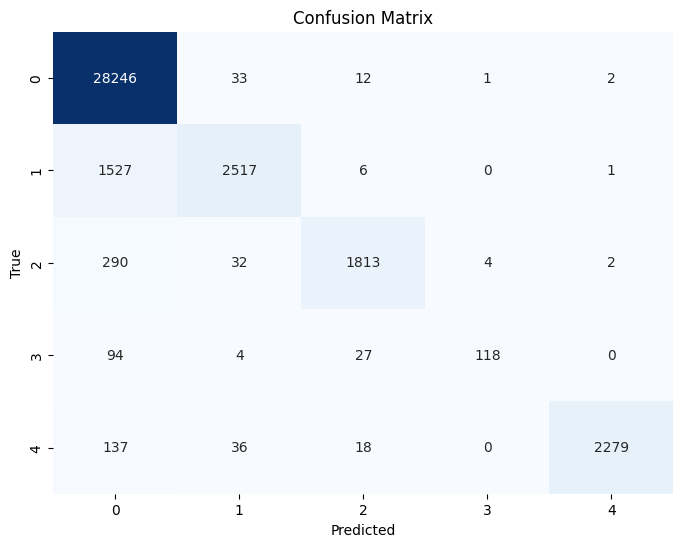

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ens, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
# Generate a classification report
ens = print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     28294
         1.0       0.96      0.62      0.75      4051
         2.0       0.97      0.85      0.90      2141
         3.0       0.96      0.49      0.64       243
         4.0       1.00      0.92      0.96      2470

    accuracy                           0.94     37199
   macro avg       0.96      0.77      0.84     37199
weighted avg       0.94      0.94      0.94     37199



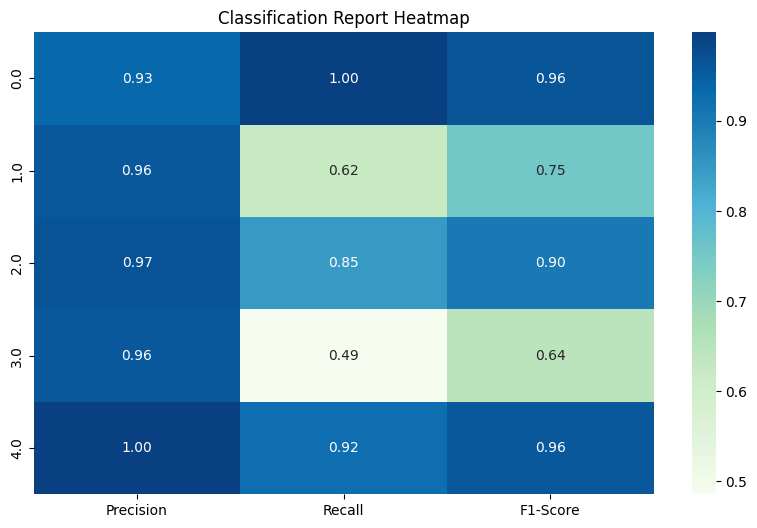

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'],
                 class_report[class_name]['f1-score']] for class_name in class_names]

    # Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'],
                yticklabels=class_names, cmap='GnBu')
plt.title('Classification Report Heatmap')
plt.show()
